# Capstone Analytic Report

Thinkful Prep Course

Author: Bryan Corder

Mentor: Hoa Tran

Submission Date: 2017/07/08

In [528]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import math
from scipy.stats import ttest_ind
import pylab
import scipy.stats as stats
from sklearn import datasets, linear_model
%matplotlib inline

# California's Next Napa?

When people talk about American wine, there is no getting around California's importance with nearly 90% of American wine being produced there. Crippled from Prohibition, the rennaissance of American wine started after World War 2 when heros of American wine such as Robert Mondavi experimented with the production of "fine wine" again. Others copied, and soon, Napa Valley wines were winning in international competitions including the Paris Wine Tasting of 1976, also referred to as the Judgment of Paris. Since then, the name Napa and the North Coast has become synonymous with quality wines, especially for their unrivaled Cabernet Sauvignon.

However, situated just three hours south of San Francisco, Paso Robles in San Luis Obispo County has started to make a name for itself. According to the Paso Wine Alliance (www.Pasowine.com), the number of vineyards has exploded in the past couple decades to over 200 wineries today. Traditionally known for their Zinfandel and Rhone varieties (e.g. Syrah), Cabernet Sauvignon is starting to make a name for itself and some claim that Paso Robles is the next Napa. 

This report attempts to dig into the claims by answering the following analytic questions using data from the Department of Agriculture and the California Chapter of the American Society of Farm Managers and Rural Appraisers (ASFMRA).

## 1. Analytic Questions

a) Does Paso Robles have the same focus on Cabernet Sauvignon as Napa does?

b) Does the market value land in Paso Robles the same as it prices land in Napa Valley?

c) Does the market value Cabernet Sauvignon grapes grown in the region of Paso Robles?

## Data Description

Since 1976, The National Agricultural Statistics Service of the Department of Agriculture has published the annual "Grape Crush Reports" on the types of grapes California farmers are growing (both for food and for wine), but for the purposes of this report, I chose to use price data from the year 2000 and the acreage reports from 2008 since that dataset only goes back that far. (https://www.nass.usda.gov/Statistics_by_State/California/Publications/Grape_Crush/Reports/) (https://www.nass.usda.gov/Statistics_by_State/California/Publications/Grape_Acreage/)

Land prices come from ASFMRA, which breaks down land types in regions by their use giving a range for their prices. From the 2013 report, with ranges getting too wide to be of use (e.g. $35,000 - $300,000), they began separating prime vineyard land from secondary and outlying vineyard land.
http://www.calasfmra.com/trends.php

This report calls the area referenced in the data sets as San Luis Obispo County, Paso Robles, to distinguish the warmer area east of the Santa Lucia Coastal Range where the weather is better suited to Cabernet Sauvignon than the coast, where varieties like Chardonnay and Pinot Noir reign. As you can see from the below bar graph, Paso Robles ("San Luis Obispo") is the second largest acreage dedicated to Cabernet Sauvignon in the entire state with 13,772 acres planted, second only to Napa Valley with 20,759 acres planted.

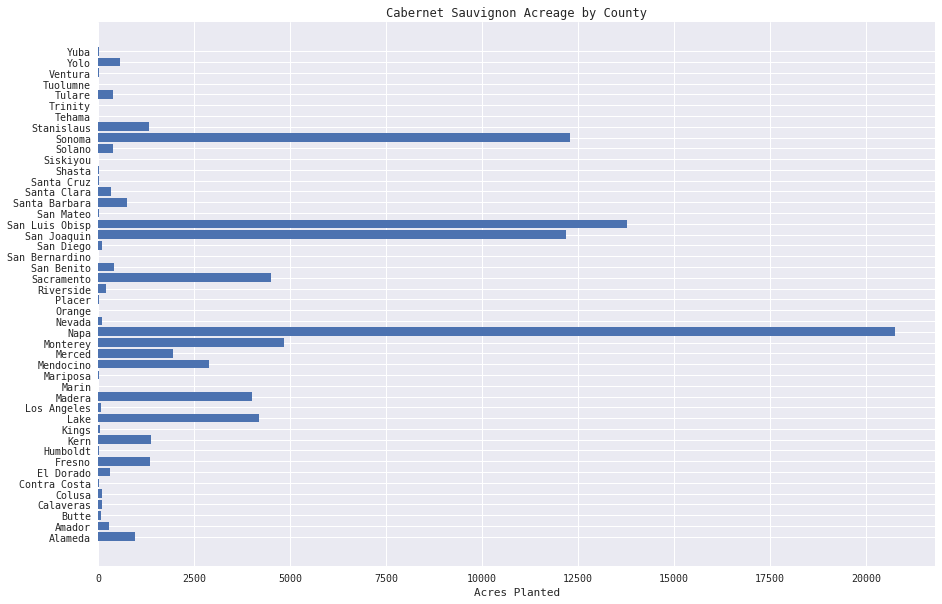

In [529]:
ca_cab_df = pd.read_csv('CA Cabernet.csv')
acres = ca_cab_df['Total']
plt.figure(figsize=(15, 10))
county = ca_cab_df['CABERNET SAUVIGNON']
xs = [i + 0.5 for i, _ in enumerate(county)]
plt.barh(xs, acres)
plt.xlabel('Acres Planted')
plt.title('Cabernet Sauvignon Acreage by County')
plt.yticks([i + 0.5 for i, _ in enumerate(county)], county)
plt.show()

#### Question 1: Does Paso Robles have the focus on Cabernet Sauvignon as Napa does?

In [530]:
napa_acre_df = pd.read_csv('Napa Acres.csv')
slo_acre_df = pd.read_csv('SLO Acres.csv')
san_joaquin_df = pd.read_csv('San Joaquin.csv')
napa_acre_df.shape
slo_acre_df.shape
san_joaquin_df.shape
exampledata = napa_acre_df[0:7]
print(exampledata)

              Variety  2008 and Earlier  2009  2010  2011  2012  2013  2014  \
0           AGLIANICO                 1     0     0     0     0     0     0   
1   ALICANTE BOUSCHET                 1     0     0     0     1     0     0   
2             BARBERA                10     0     0     0     0     0     0   
3      CABERNET FRANC              1032    25    36     6     2    13     8   
4  CABERNET SAUVIGNON             17834   503   209   312   429   270   363   
5           CARIGNANE                 4     0     0     0     0     0     0   
6           CARMENERE                 5     0     0     0     0     2     0   

   2015  2016  Total  Total Red  Total White  
0     0     0      1    34841.0      10501.0  
1     0     0      2        NaN          NaN  
2     0     0     10        NaN          NaN  
3    18     9   1149        NaN          NaN  
4   515   324  20759        NaN          NaN  
5     0     0      4        NaN          NaN  
6     0     0      7        NaN       

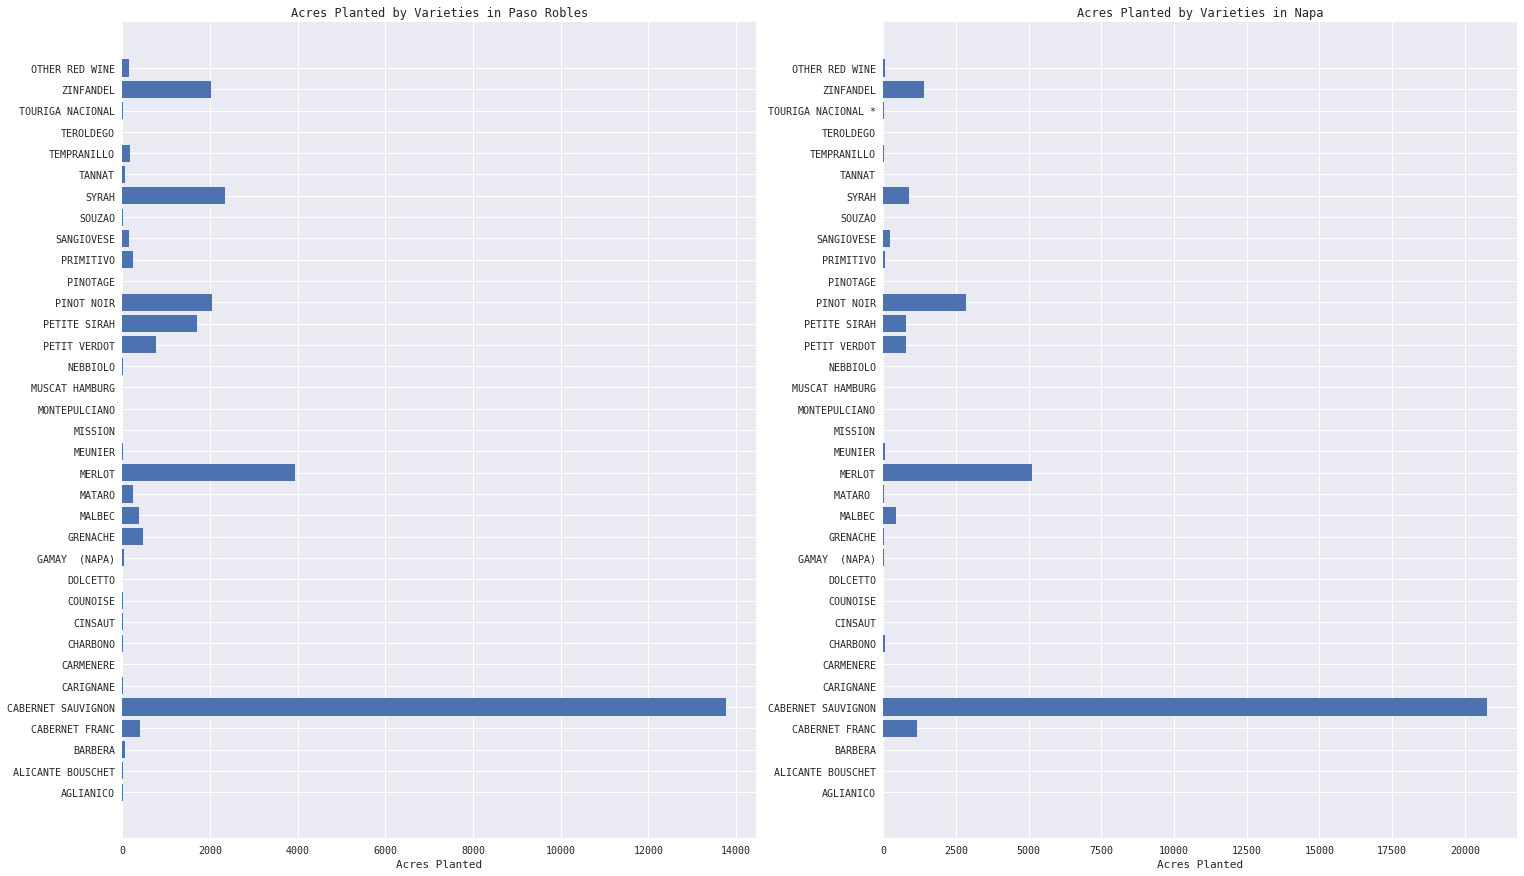

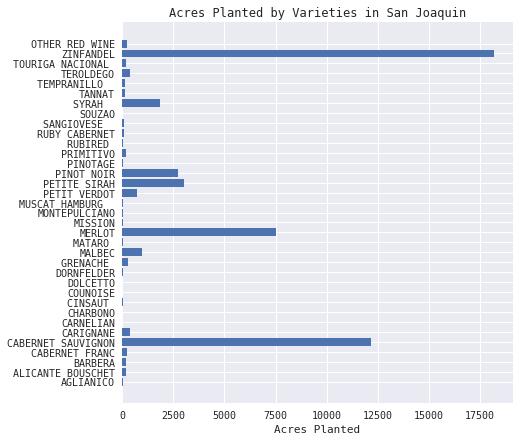

In [531]:
plt.figure(figsize=(25, 15))
plt.subplot(1, 2, 1)
grapes = slo_acre_df['Variety']
acres = slo_acre_df['Total']
xs = [i + 0.5 for i, _ in enumerate(grapes)]
plt.barh(xs, acres)
plt.xlabel('Acres Planted')
plt.title('Acres Planted by Varieties in Paso Robles')
plt.yticks([i + 0.5 for i, _ in enumerate(grapes)], grapes)

plt.subplot(1, 2, 2)
grapes = napa_acre_df['Variety']
acres2 = napa_acre_df['Total']
xs = [i + 0.5 for i, _ in enumerate(grapes)]
plt.barh(xs, acres2)
plt.xlabel('Acres Planted')
plt.title('Acres Planted by Varieties in Napa')
plt.yticks([i + 0.5 for i, _ in enumerate(grapes)], grapes)
plt.show()

plt.figure(figsize=(7, 7))
grapes = san_joaquin_df['Variety']
acres3 = san_joaquin_df['Total']
xs = [i + 0.5 for i, _ in enumerate(grapes)]
plt.barh(xs, acres3)
plt.xlabel('Acres Planted')
plt.title('Acres Planted by Varieties in San Joaquin')
plt.yticks([i + 0.5 for i, _ in enumerate(grapes)], grapes)
plt.show()


The bar graphs above list all of the varieties grown in Napa, Paso Robles, and San Joaquin of the Central Valley, the third largest outside of the Napa/Sonoma area. It is clear from the size of the Cabernet Sauvignon bar that it is the dominant variety in both Napa and Paso Robles, but even though Cabernet is produced widely in San Joaquin (12,174 acres), it pales in comparison to the number of acres devoted to their signature grape, Zinfandel (18,191 acres). Let's look at the evolution of Napa and Paso Robles in the past decade in numbers.

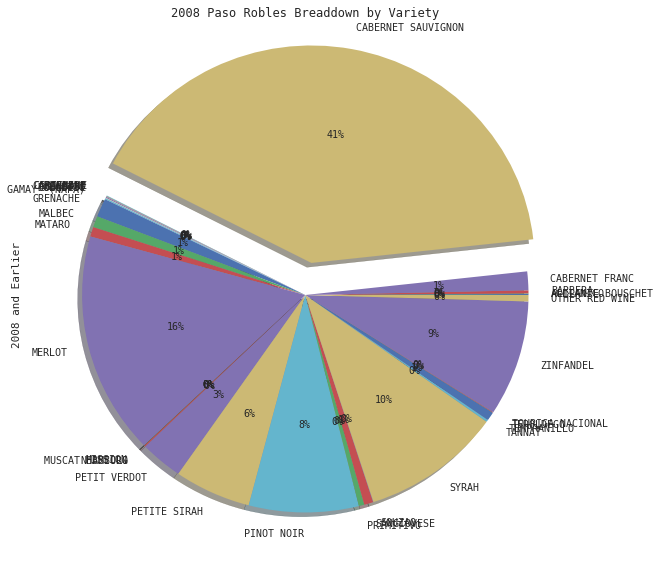

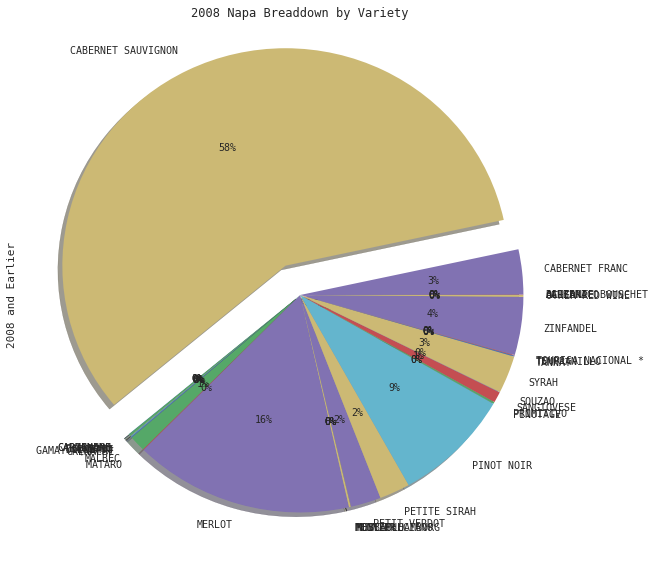

In [532]:
slo2008 = slo_acre_df['2008 and Earlier']        

# exploding interesting parts of our graph
labels = slo_acre_df['Variety']
explode = (0, 0, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
n1 = 35073 

# plotting our data
slo2008.plot(kind='pie', figsize=(10,10), labels=labels, explode=explode, shadow=True, autopct='%1.0f%%')
plt.title('2008 Paso Robles Breaddown by Variety')
plt.show()
        
napa2008 = napa_acre_df['2008 and Earlier']
# exploding interesting parts of our graph
labels = napa_acre_df['Variety']
explode = (0, 0, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
n1 = 35073 

# plotting our data
napa2008.plot(kind='pie', figsize=(10,10), labels=labels, explode=explode, shadow=True, autopct='%1.0f%%')
plt.title('2008 Napa Breaddown by Variety')
plt.show()

The above pie graphs show that in 2008, Cabernet Sauvignon took just 40.7% (8,908 acres of 21,554 acres of red grapes) of the total acreage of wine grapes in Paso Robles while it took on 57.7% (17,834 acres of 30,923 of red grapes) in Napa Valley making it clearly the dominant grape in the region.

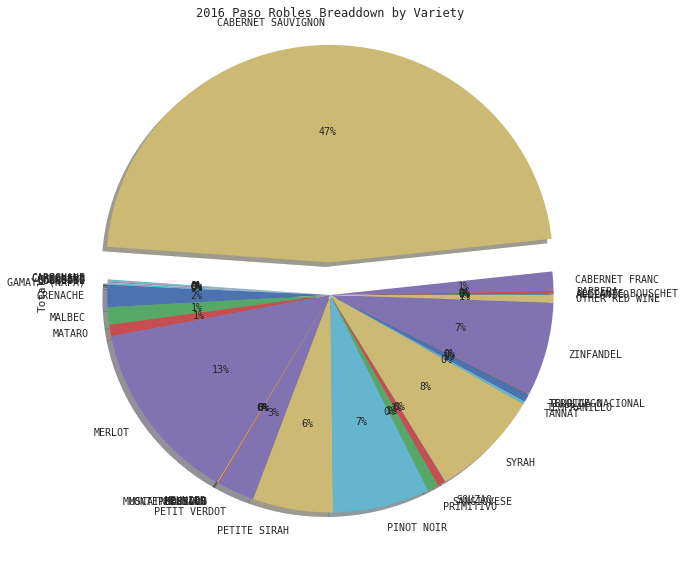

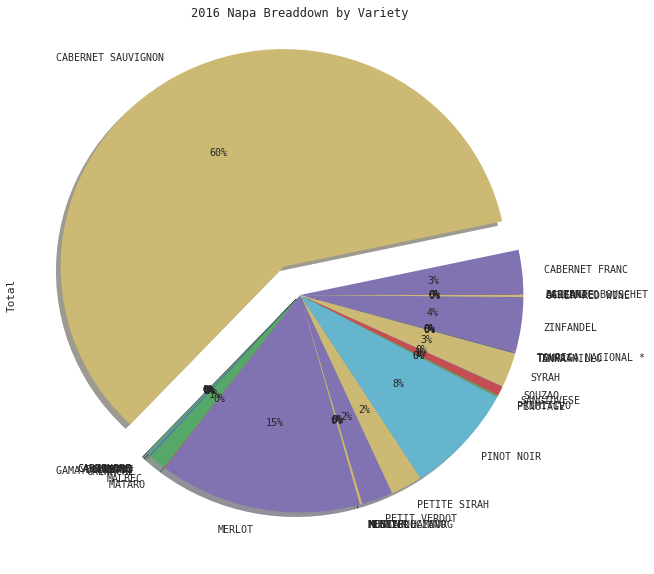

In [533]:
slonow = slo_acre_df['Total']
        
# exploding interesting parts of our graph
labels = slo_acre_df['Variety']
explode = (0, 0, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
n1 = 35073 

# plotting our data
slonow.plot(kind='pie', figsize=(10,10), labels=labels, explode=explode, shadow=True, autopct='%1.0f%%')
plt.title('2016 Paso Robles Breaddown by Variety')
plt.show()
        
napanow = napa_acre_df['Total']
# exploding interesting parts of our graph
labels = napa_acre_df['Variety']
explode = (0, 0, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
n1 = 35073 

# plotting our data
napanow.plot(kind='pie', figsize=(10,10), labels=labels, explode=explode, shadow=True, autopct='%1.0f%%')
plt.title('2016 Napa Breaddown by Variety')
plt.show()

However, by 2016, Cabernet Sauvignon now occupies 47.1% (13,772 acres of 28,967 acres of red grapes) of the total acres while it has taken on slightly more growth in Napa Valley at 59.6% (20,759 acres of 34,838 acres of red grapes).  Of the 7,413 acres planted in Paso Robles, 4,864 of them were dedicated to Cabernet Sauvignon or nearly two out of three acres of vines planted were dedicated to Cabernet Sauvignon.

Ttest_indResult(statistic=-0.21949722999080618, pvalue=0.82701182704319987)


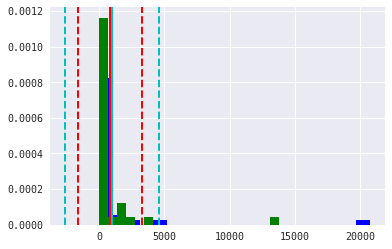

In [534]:
napa = napa_acre_df['Total']
paso = slo_acre_df['Total']
plt.hist(napa, normed=True, bins=20, color='b', label='Napa')
plt.hist(paso, normed=True, bins=20, color='g', label='Paso Robles')
plt.axvline(napa.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(napa.mean() + napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(napa.mean() - napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(paso.mean() + paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean() - paso.std(), color='red', linestyle='dashed', linewidth=2)
print(ttest_ind(paso, napa, equal_var=False))
plt.show()

Plotting them in a histogram, you can see their distributions are very similar with a ttest score of less than 1 meaning there is little variation, however, the p value is too large and fails to reject the null hypothesis.

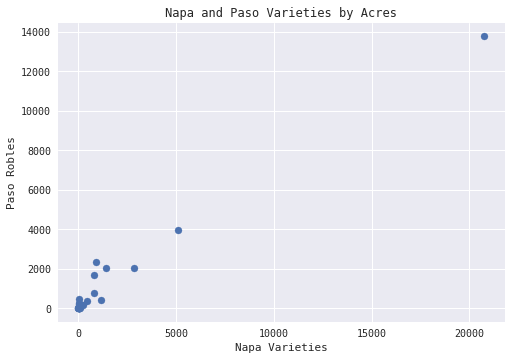

In [546]:
plt.scatter(x = napa_acre_df['Total'], y = slo_acre_df['Total'])
plt.xlabel('Napa Varieties')
plt.ylabel('Paso Robles')
plt.title('Napa and Paso Varieties by Acres')

plt.show()

When plotted against each other in a scatter plot, they show better correlation in their variety distribution. They both place an emphasis on Cabernet Sauvignon grapes (the coordinate in the upper right hand corner of the graph). Paso Robles may not have as many acres planted as Napa Valley, but trends show that Paso Robles is adopting the grape faster than any other variety, while Napa Valley continues to expand its Cabernet production.

#### Question 2: Does the market value land in Paso Robles the same as it prices land in Napa Valley?

In [547]:
land_df = pd.read_csv('Land Prices.csv')
land_df.shape
exampleland = land_df[0:5]
print(exampleland)

   Unnamed: 0  Napa Prime Low  Napa Prime High  Napa Secondary Low  \
0        2003             NaN           180000                 NaN   
1        2004             NaN           180000                 NaN   
2        2005             NaN           200000                 NaN   
3        2006             NaN           275000                 NaN   
4        2007        225000.0           285000            130000.0   

   Napa Secondary High  Napa Outlying Low  Napa Outlying High  Paso Low  \
0                  NaN              50000                 NaN     12000   
1                  NaN              55000                 NaN     21000   
2                  NaN              55000                 NaN     21000   
3                  NaN              50000                 NaN     25000   
4             215000.0              55000             75000.0     25000   

   Paso High  wrsb Low  wrsb High  
0      30000       NaN        NaN  
1      31000       NaN        NaN  
2      32000       N

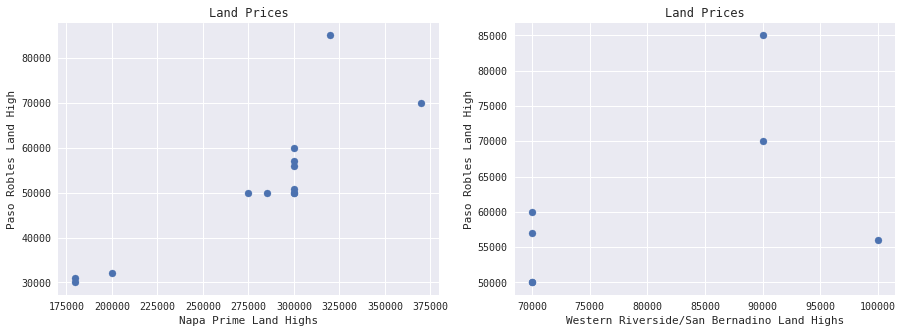

In [548]:
napa_high = land_df['Napa Prime High']
paso_high = land_df['Paso High']
wrsb_high = land_df['wrsb High']

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(x = napa_high, y = paso_high)
plt.xlabel('Napa Prime Land Highs')
plt.ylabel('Paso Robles Land High')
plt.title('Land Prices')

plt.subplot(1, 2, 2)
plt.scatter(x = wrsb_high, y = paso_high)
plt.xlabel('Western Riverside/San Bernadino Land Highs')
plt.ylabel('Paso Robles Land High')
plt.title('Land Prices')

plt.show()

The scatter plots show a tighter relationship between Napa's prime land versus Paso Robles than it does between another wine growing region south of Los Angeles, though there is no correlation.

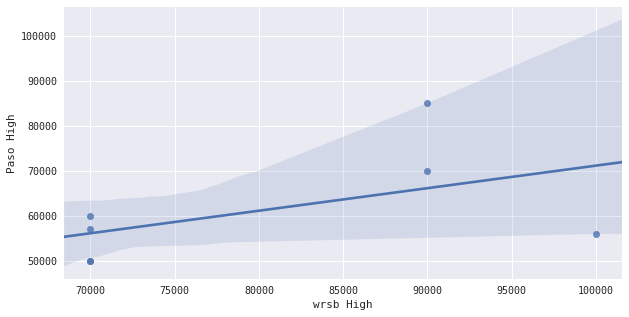

In [549]:
wrsb = land_df['wrsb High']
paso = land_df['Paso High']
f, ax = plt.subplots(figsize=(10, 5))
sns.regplot(x=wrsb, y=paso)
plt.show()

Plotting the vineyard lands of Western Riverside/San Bernadino together with Paso Robles shows very low correlation and high dispersion.

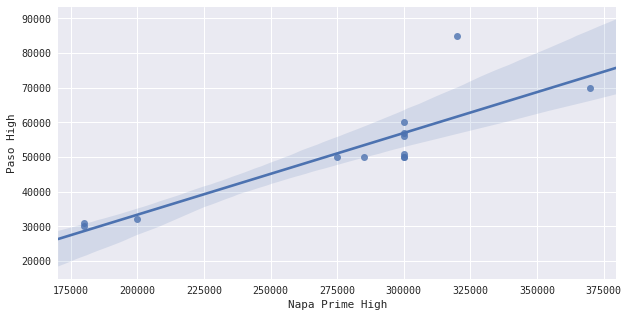

In [550]:
napa = land_df['Napa Prime High']
paso = land_df['Paso High']
f, ax = plt.subplots(figsize=(10, 5))
sns.regplot(x=napa, y=paso)
plt.show()

While the WRSB/Paso relationship shows high dispersion, the replationship between Napa and Paso Robles is positively correlated even though the level of correlation is not strong.

Ttest_indResult(statistic=-13.883594876182109, pvalue=1.7350150647847125e-09)


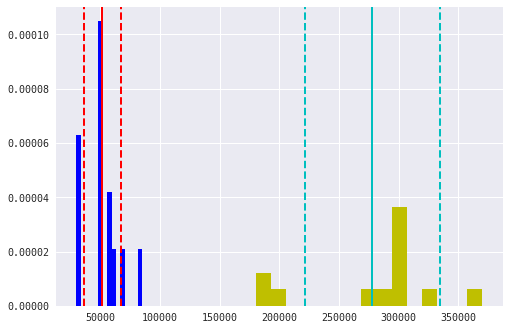

In [551]:
plt.hist(napa, normed=True, bins=15, color='y', label='Napa')
plt.hist(paso, normed=True, bins=15, color='b', label='Paso Robles')
plt.axvline(napa.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(napa.mean() + napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(napa.mean() - napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(paso.mean() + paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean() - paso.std(), color='red', linestyle='dashed', linewidth=2)
print(ttest_ind(paso, napa, equal_var=False))
plt.show()

Plotting the Paso high and Napa Prime High distributions on histograms shows that they are not similar and that they vary too much signaling that observing Paso Robles' land prices in terms of Napa land prices is not a reliable number. The low P-Value shows that the data rejects the null hypothesis. The market doesn't look at vineyard space in both regions similarly.

#### Question 3: Napa Cabernet Sauvignon are some of the most expensive grapes on the market. As the base component in wine, it is important to see if the market values Cabernet Sauvignon grapes the same from both regions. How do they compare?

In [552]:
cost_df = pd.read_csv('Cost per Ton 2.csv')
cost_df.shape
examplecost = cost_df[11:17]
print(examplecost)

    Year   area 1   area 2   area 3     Napa   area 5   area 6   area 7  \
11  2011  1315.75  1365.78  2111.24  4660.36  1168.33  1283.98   944.25   
12  2012  1589.23  1615.19  2313.56  5059.96  1571.45  1213.63  1041.29   
13  2013  1685.32  1725.08  2462.99  5473.94  1710.69  1205.00  1055.52   
14  2014  1852.88  2009.89  2614.37  5923.36  1689.31  1258.86  1142.57   
15  2015  1923.76  2158.83  2724.17  6288.52  1755.22  1352.55  1235.41   
16  2016  2058.34  2345.51  2964.60  6830.22  1972.52  1393.88  1314.28   

    Paso Robles  area 9  area 10  area 11  area 12  area 13  area 14  area 15  \
11      1119.28  577.01  1183.75   620.84   535.62   485.94   480.03  1000.00   
12      1295.77  640.02  1316.40   727.96   604.81   542.77   646.91   787.02   
13      1377.55  725.77  1404.43   708.38   586.23   522.93   674.73  1658.54   
14      1464.62  634.91  1284.51   660.18   526.42   422.20   301.56   657.14   
15      1545.02  741.23  1177.92   655.97   488.84   381.03   295.47 

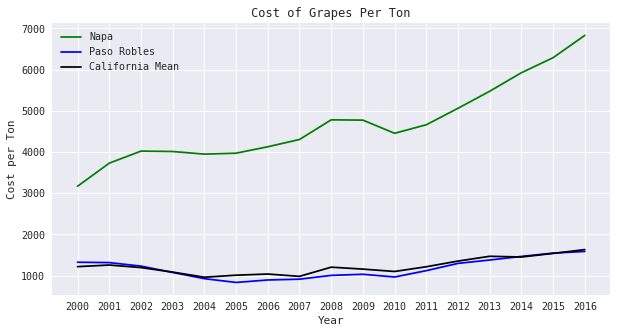

In [553]:
plt.figure(figsize=(10, 5))
plt.plot(cost_df['Napa'], color = 'green')
plt.plot(cost_df['Paso Robles'], color = 'blue')
plt.plot(cost_df['Mean'], label='California Mean', color='black')
dates = Counter(cost_df['Year'])
years = sorted(dates.items(), key=lambda pair: pair[1])
keys = [x[0] for x in years]
x_pos = np.arange(len(keys))
plt.xticks(x_pos, keys)
plt.xlabel('Year')
plt.ylabel('Cost per Ton')
plt.title('Cost of Grapes Per Ton')
plt.legend(loc='upper left') 

plt.show()

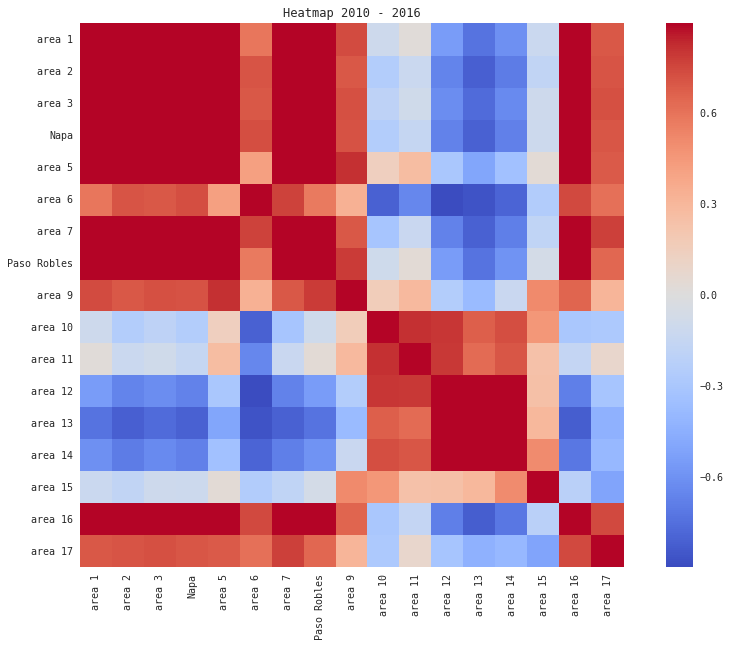

In [554]:
napa_lately = cost_df[11:17]
sns.set(context='notebook', font='monospace')
corrmat=napa_lately[['area 1', 'area 2', 'area 3', 'Napa', 'area 5', 'area 6', 'area 7', 'Paso Robles', 'area 9', 'area 10','area 11', 'area 12', 'area 13', 'area 14', 'area 15', 'area 16', 'area 17']].corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='coolwarm')
plt.title('Heatmap 2010 - 2016')
plt.show()

The heatmap shows correlation in the prices between Napa and its surrounding areas (areas 1 - 5 go from Mendocino county to Solano county and all are part of the "North Coast") as well as area 7 (Monterey and San Benito counties) and Paso Robles which are part of the "Central Coast."

(Map Ref: https://www.nass.usda.gov/Statistics_by_State/California/Publications/Grape_Crush/Grape%20Crush%20Districts%20Map.pdf)

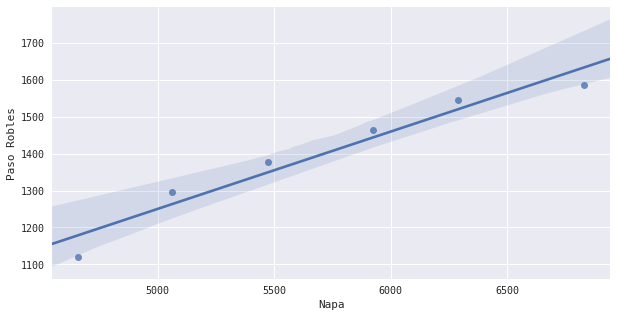

In [555]:
f, ax = plt.subplots(figsize=(10, 5))
sns.regplot(x='Napa', y='Paso Robles', data=napa_lately)
plt.show()

Isolating Paso Robles and Napa Valley on a scatterplot, you can see how closely their prices align in a positive correlation though they are still far apart in nominal terms with Napa Valley grapes pulling in over $6,500 per ton while grapes from Paso Robles can't clear $1,600 per ton.

Ttest_indResult(statistic=0.74078594977525869, pvalue=0.46439736828741729)


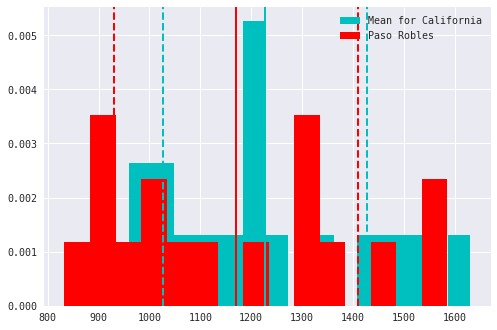

In [556]:
winemean = cost_df['Mean']
plt.hist(winemean, normed=True, bins=15, color='c', label='Mean for California')
plt.hist(paso_cost, normed=True, bins=15, color='r', label='Paso Robles')
plt.axvline(winemean.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(winemean.mean() + winemean.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(winemean.mean() - winemean.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(paso_cost.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(paso_cost.mean() + paso_cost.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(paso_cost.mean() - paso_cost.std(), color='red', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right') 
print(ttest_ind(winemean, Paso, equal_var=False))
plt.show()

Again, plotting them on a histogram against the mean for the state of California (including Napa) shows that the market values grapes from Paso similar to how they price the grapes from the entire state. Paso Robles and the Central Coast is looking more like the North Coast in their trend, but the price gap is still significant.

## Further Research

From the above data, Paso Robles is certainly moving in the direction of Napa Valley in terms of its emphasis on Cabernet Sauvignon, but looking at land prices and grape prices, the market still values Paso Robles closer to the rest of the wine growing regions in the state with the qualification that grape pricing of late is starting to trend with the North Coast.

This research only skimmed the surface of the data and can be vastly improved utilizing data mining from websites such as wine-searcher.com for pricing on wines from each respective region. Data on other components in the wine making process from labor costs and materials (yeast, other additive oak barrels, etc) could be used to generate a more accurate picture of the price per bottle to measure profitability of both regions and show just how far of a gap there is in the market's view of Napa versus Paso Robles.

In terms of wine quality, there are a number of measures that could also be incorporated including data from critics reviews to weather data and a focus on average yield per acre. However, if I were to proceed with looking into this further, I'd focus on the market aspects since no matter how good a wine is, if no one ever drinks it, ultimately, it doesn't really matter.

## References

https://www.nass.usda.gov/Statistics_by_State/California/Publications/Grape_Crush/Reports/

https://www.nass.usda.gov/Statistics_by_State/California/Publications/Grape_Acreage/

http://www.calasfmra.com/trends.php

https://pasowine.com/faq/

Regarding the history of American Wine:

http://publishing.cdlib.org/ucpressebooks/view?docId=ft967nb63q;chunk.id=0;doc.view=print

https://www.amazon.com/American-Wine-Coming-Age-Story/dp/1569761671
